# Installing required libraries

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

# I. Đọc dữ liệu

In [53]:
from preprocessor.sklearn_preprocessor import preprocess_data
from featureEngineering.Visualizer import Visualizer
from featureEngineering.FeatureSelection import FeatureSelection

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [54]:
path = './data/'
data = pd.read_csv(path + 'train.csv')

In [55]:
print(f'Số lượng dòng của data: {len(data)}')
print(data.columns)

Số lượng dòng của data: 1647
Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [56]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

# I. Tiền xử lý dữ liệu

## 1. Cleaning data


In [58]:
data.dropna(how='all')
data.drop_duplicates()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Maruti Suzuki,Ciaz ZDi (O) [2014-2015],635000,2016,92000,Diesel,Manual,Mohali,White,Second,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
1643,Honda,Civic 1.8V MT,777000,2014,9212,Petrol,Manual,Patna,Grey,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1644,Maruti Suzuki,Alto VXi [2014-2019],369000,2017,16800,Petrol,Manual,Mumbai,Grey,First,Individual,998 cc,67 bhp @ 6000 rpm,90 Nm @ 3500 rpm,FWD,3545.0,1490.0,1475.0,5.0,35.0
1645,BMW,5-Series 525d Luxury Plus,2280000,2014,68000,Diesel,Automatic,Pune,Blue,First,Individual,1995 cc,217 bhp @ 4400 rpm,450 Nm @ 1500 rpm,RWD,4899.0,2094.0,1464.0,5.0,NaN


In [59]:
def clean_data(data):
    data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

    data[['Max Power BHP', 'Max Power RPM']] = data['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm')
    data['Max Power BHP'] = pd.to_numeric(data['Max Power BHP'], errors='coerce')
    data['Max Power RPM'] = pd.to_numeric(data['Max Power RPM'], errors='coerce')

    data[['Max Torque Nm', 'Max Torque RPM']] = data['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm')
    data['Max Torque Nm'] = pd.to_numeric(data['Max Torque Nm'], errors='coerce')
    data['Max Torque RPM'] = pd.to_numeric(data['Max Torque RPM'], errors='coerce')

    data = data.drop('Max Power', axis=1)
    data = data.drop('Max Torque', axis=1)
    
    rare_fuel_types = ['Electric', 'LPG', 'Hybrid', 'CNG + CNG', 'Petrol + LPG']
    data["Fuel Type"] = data["Fuel Type"].apply(lambda x: 'Others' if x in rare_fuel_types else x)
    
    return data

In [60]:
data = clean_data(data)

## 2. Splitting and preprocessing

In [61]:
drop_columns = ['Make', 'Model', 'Location', 'Color']
data.drop(drop_columns, axis=1, inplace=True)

In [62]:
# Apply splitting and preprocessing
train_df, test_df, preprocessor, feature_names = preprocess_data(
    data=data,
    save_path='./processed_data/',
    train_ratio=0.7,
    test_ratio=0.3,
)

In [63]:
# Check if there are any columns with object type in the transformed dataframes
print("Train DataFrame Object Types:", train_df.select_dtypes(include=['object']).columns.tolist())
print("Test DataFrame Object Types:", test_df.select_dtypes(include=['object']).columns.tolist())

# If there are object columns, convert them to numeric
for df in [train_df, test_df]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col])

# Verify the conversion worked
print("\nAfter conversion:")
print("Train DataFrame Types:", train_df.dtypes.value_counts())
print("Test DataFrame Types:", test_df.dtypes.value_counts())

Train DataFrame Object Types: []
Test DataFrame Object Types: []

After conversion:
Train DataFrame Types: float64    22
Name: count, dtype: int64
Test DataFrame Types: float64    22
Name: count, dtype: int64


# II. Modeling

## 1. Chọn các cột đặc trưng

In [64]:
from modelling.Model import StandardRegression, PolynomialRegression

oneHotCols = ['Drivetrain', 'Fuel Type', 'Seller Type', 'Transmission']

model_type = StandardRegression
model = model_type()

train = model.transform_features(train_df)
test = model.transform_features(test_df)
corr = train.corr()
sort_order = corr['Price'].abs().sort_values(ascending=False).index
sorted_corr = corr.loc[sort_order, sort_order]
subcols = sorted_corr.index.tolist()
subcols = subcols[:14]
subtract = ['Fuel Type_Petrol', 'Fuel Type_Diesel', 'Price']
subcols = list(set(subcols) - set(subtract))
add = []
subcols = subcols + add
subcols

['Max Power RPM',
 'Max Torque RPM',
 'Transmission_Manual',
 'Fuel Tank Capacity',
 'Length',
 'Drivetrain_FWD',
 'Width',
 'Engine',
 'Drivetrain_RWD',
 'Max Power BHP',
 'Year']

In [65]:
print('Các cột đã bỏ:')
set(train_df.columns) - set(subcols)

Các cột đã bỏ:


{'Fuel Type_Diesel',
 'Fuel Type_Others',
 'Fuel Type_Petrol',
 'Height',
 'Kilometer',
 'Max Torque Nm',
 'Owner',
 'Price',
 'Seating Capacity',
 'Seller Type_Corporate',
 'Seller Type_Individual'}

In [66]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def testing(subcols, linear=True, deg=2, auto_selection = True, model_type=None):
    if linear:
        model = StandardRegression()
    else:
        model = model_type(degree=deg)

    train = model.transform_features(train_df.drop('Price', axis=1))
    test = model.transform_features(test_df.drop('Price', axis=1))

    train['Price'] = train_df['Price']
    test['Price'] = test_df['Price']

    if auto_selection:
        subcols, r2 = FeatureSelection.forward_selection_r2(
            train[subcols + ['Price']],
            oneHotCols=oneHotCols,
            target='Price',
            model = model
        )
        print('Adjusted log r^2 on transformed target:', r2)
        print('Eliminated features:', set(train.columns.to_list()) - set(subcols))
    
    print('Chosed columns: ', subcols)
    print('Total columns: ', len(subcols))

    model.fit(train[subcols], train['Price'])
    y_train = np.exp(train['Price'])
    y_test = np.exp(test['Price'])
    y_train_pred = np.exp(model.predict(train[subcols]))
    y_test_pred = np.exp(model.predict(test[subcols]))

    print('Train r^2: ', r2_score(y_train, y_train_pred))
    print('Train MAE: ', f"{mean_absolute_error(y_train, y_train_pred):.3e}")
    print('Train MSE: ', f"{mean_squared_error(y_train, y_train_pred):.3e}")

    print('Test r^2: ', r2_score(y_test, y_test_pred))
    print('Test MAE: ', f"{mean_absolute_error(y_test, y_test_pred):.3e}")
    print('Test MSE: ', f"{mean_squared_error(y_test, y_test_pred):.3e}")

    Visualizer.residual_plot([y_train, y_train_pred], [y_test, y_test_pred])
    Visualizer.qq_plot((y_train, y_train_pred), (y_test, y_test_pred))
    Visualizer.scale_location_plot((y_train, y_train_pred), (y_test, y_test_pred))


## 2. So sánh mô hình

### Linear regression

Chosed columns:  ['Max Power RPM', 'Max Torque RPM', 'Transmission_Manual', 'Fuel Tank Capacity', 'Length', 'Drivetrain_FWD', 'Width', 'Engine', 'Drivetrain_RWD', 'Max Power BHP', 'Year']
Total columns:  11
Train r^2:  0.7898911397731632
Train MAE:  4.140e+05
Train MSE:  1.347e+12
Test r^2:  0.8460039060669212
Test MAE:  3.515e+05
Test MSE:  6.043e+11


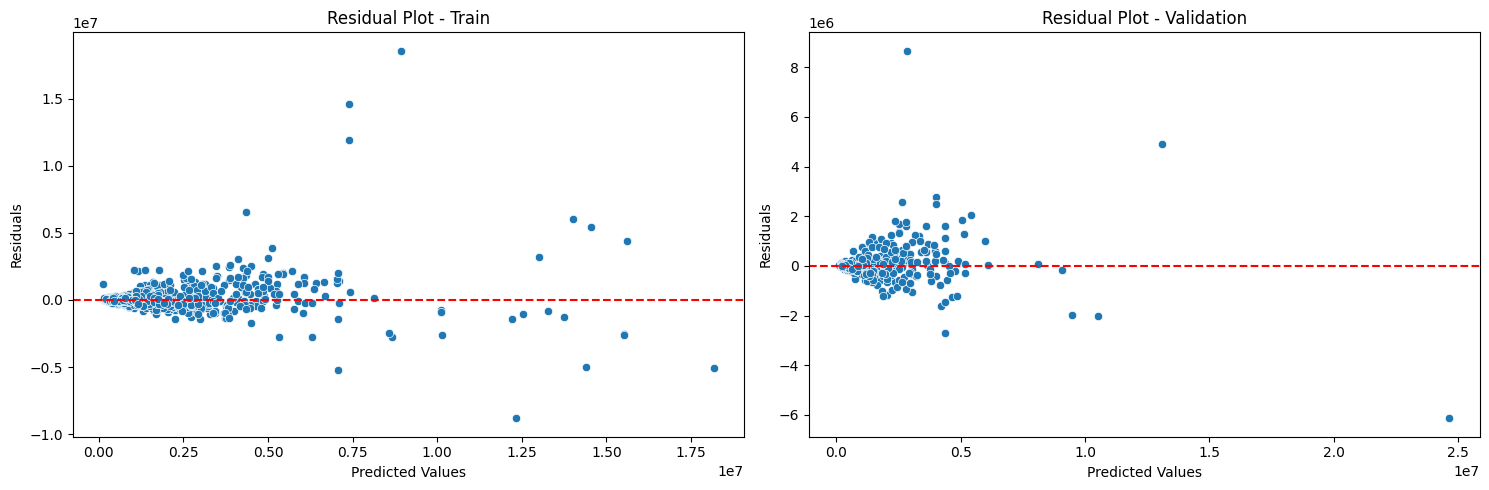

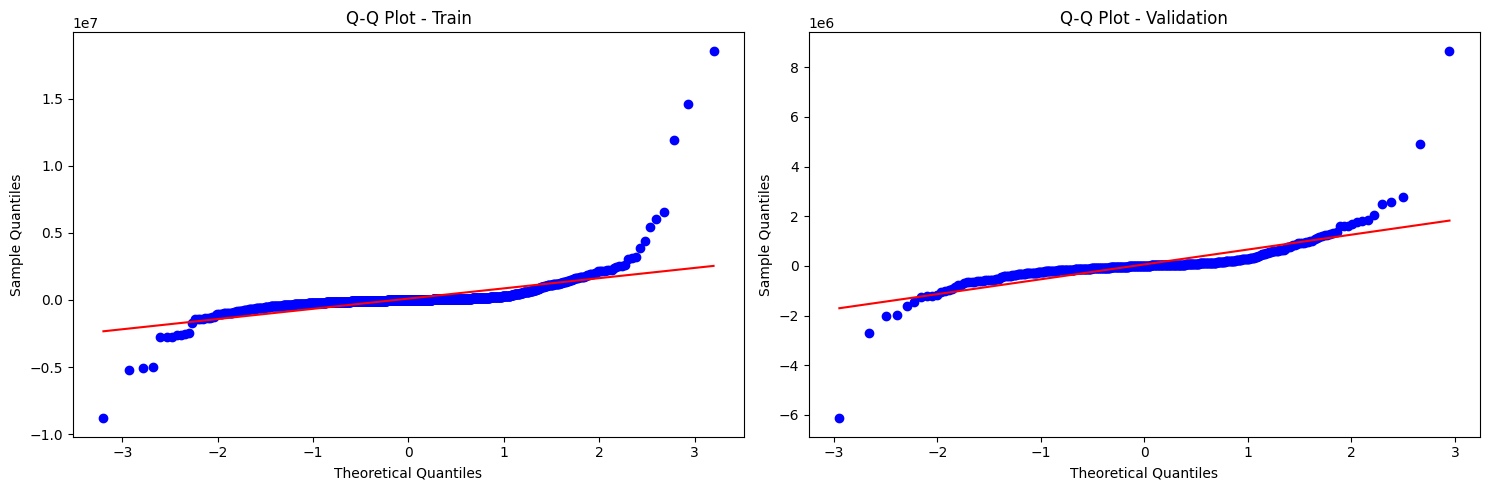

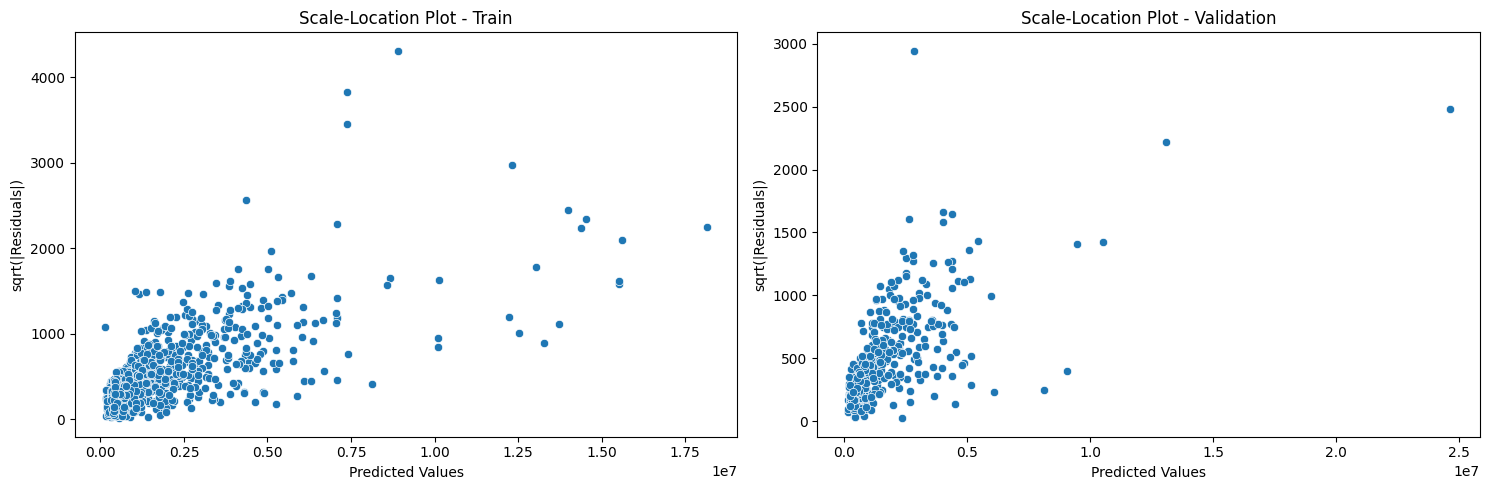

In [67]:
testing(subcols=subcols, linear=True, auto_selection=False)

### Linear regression with auto feature selection

Adjusted log r^2 on transformed target: 0.9262321610770197
Eliminated features: {'Max Power RPM', 'Engine', 'Price'}
Chosed columns:  ['Max Power BHP', 'Year', 'Length', 'Transmission_Manual', 'Max Torque RPM', 'Fuel Tank Capacity', 'Seating Capacity', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Width', 'Kilometer', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Height', 'Max Torque Nm', 'Seller Type_Corporate', 'Seller Type_Individual', 'Owner']
Total columns:  19
Train r^2:  0.8234962776582814
Train MAE:  3.770e+05
Train MSE:  1.131e+12
Test r^2:  0.8914066462856979
Test MAE:  3.156e+05
Test MSE:  4.261e+11


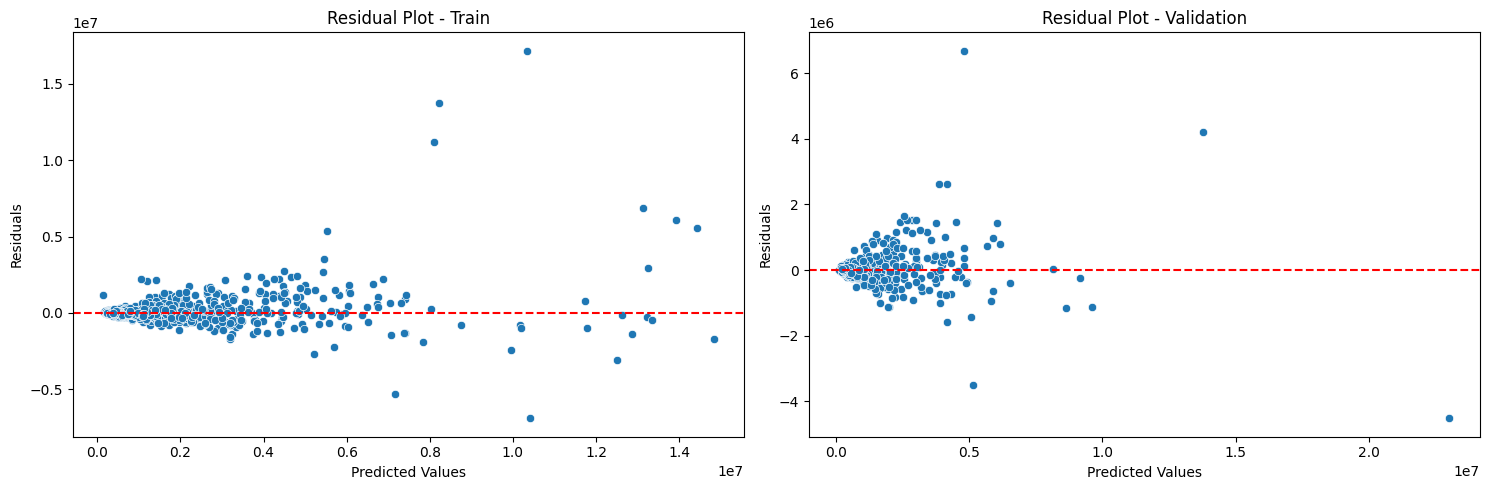

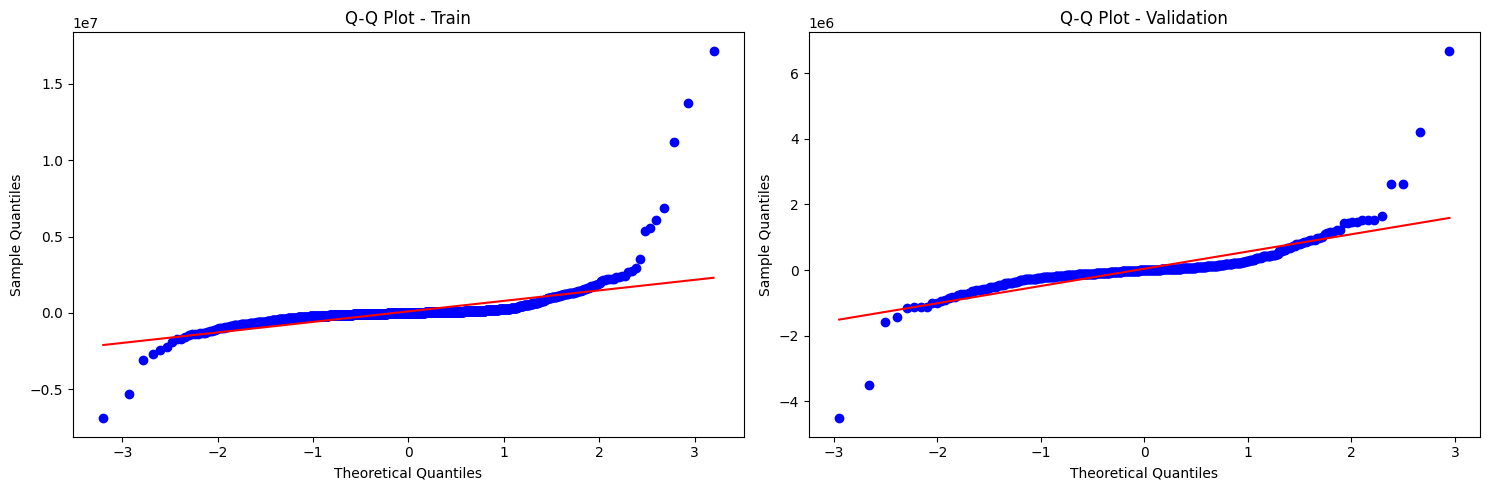

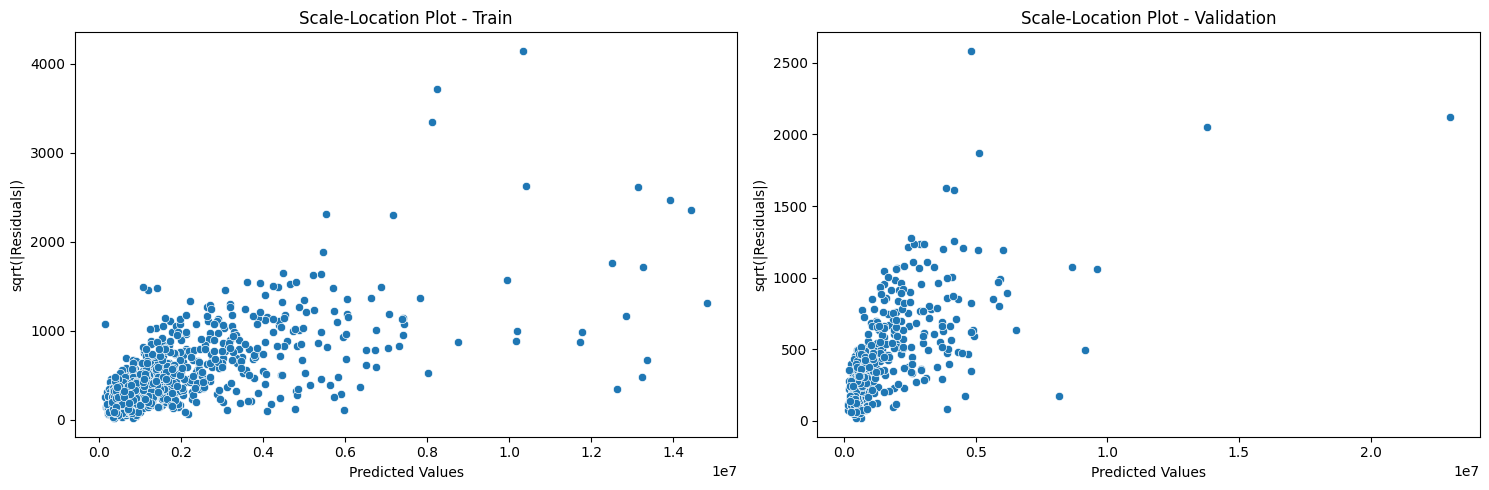

In [68]:
testing(subcols=train_df.drop(columns='Price').columns.to_list(), auto_selection=True)

### Polynomial regression (degree = 2)

Adjusted log r^2 on transformed target: 0.9355729331792128
Eliminated features: {'Max Power BHP^2', 'Owner^2', 'Max Torque Nm^2', 'Seller Type_Corporate^2', 'Fuel Type_Diesel^2', 'Year^2', 'Max Torque RPM^2', 'Transmission_Manual^2', 'Kilometer^2', 'Max Power RPM^2', 'Seating Capacity^2', 'Price', 'Engine^2', 'Height^2', 'Width^2', 'Seller Type_Individual^2', 'Length^2', 'Drivetrain_FWD^2', 'Drivetrain_RWD^2', 'Fuel Tank Capacity^2', 'Fuel Type_Others^2', 'Fuel Type_Petrol^2'}
Chosed columns:  ['Max Power BHP', 'Year', 'Transmission_Manual', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Length', 'Width', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer', 'Max Torque RPM', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Height', 'Max Power RPM', 'Owner', 'Seller Type_Corporate', 'Seller Type_Individual', 'Max Torque Nm', 'Engine']
Total columns:  21
Train r^2:  0.834651211729836
Train MAE:  3.676e+05
Train MSE:  1.060e+12
Test r^2:  0.8614883178978592
Test MAE:  3.257e+05
Test M

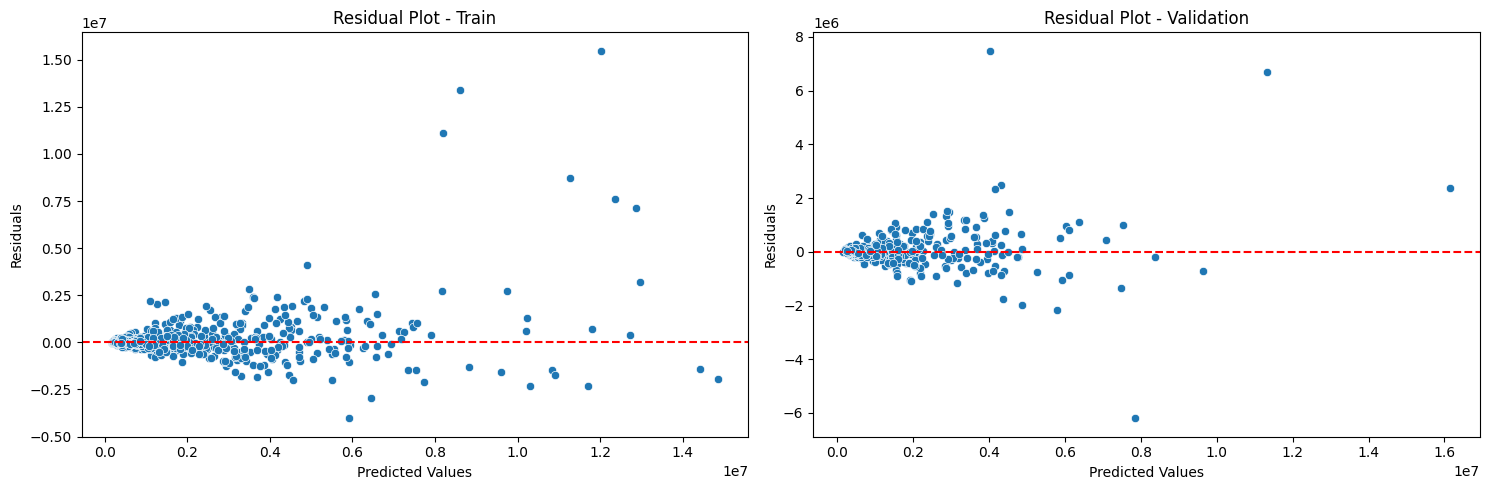

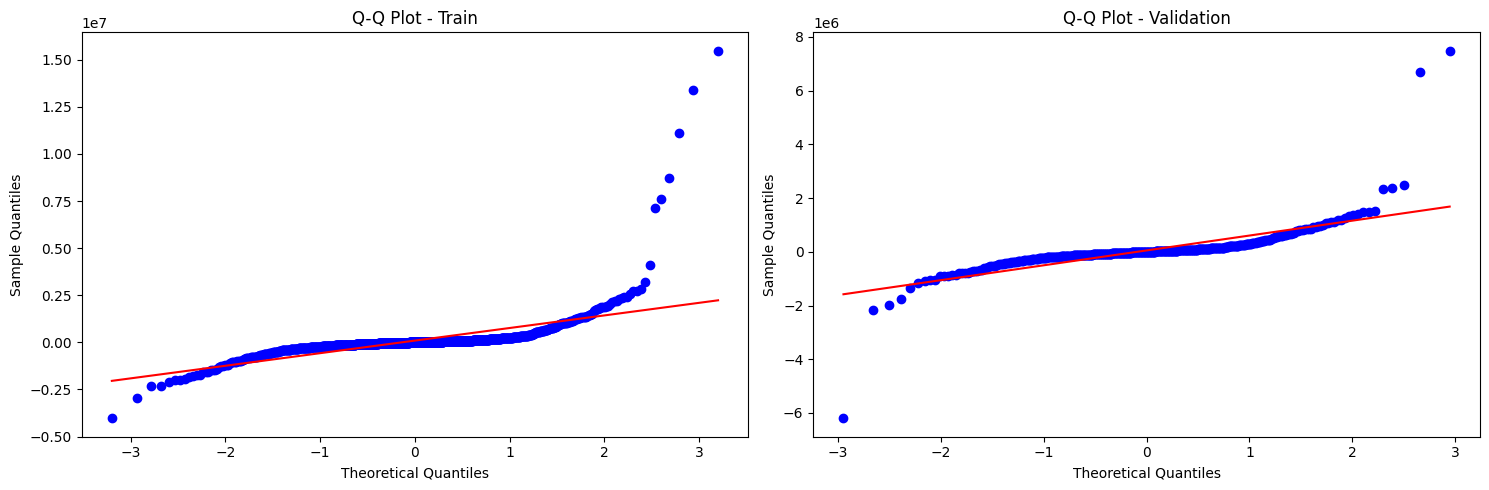

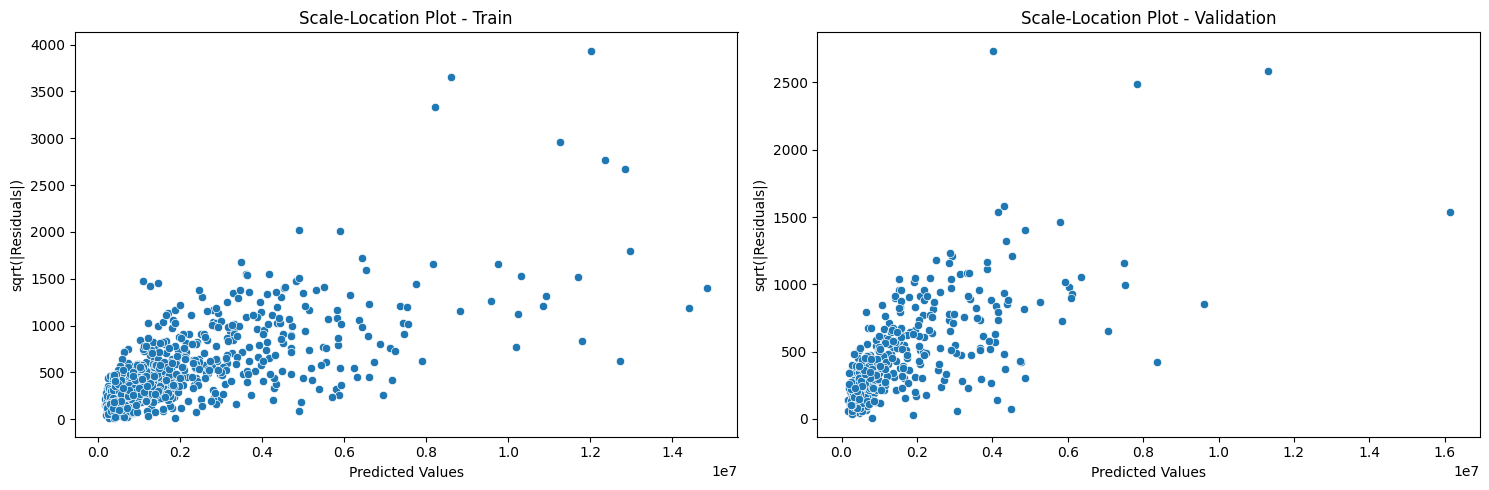

In [69]:
testing(subcols=train_df.drop(columns='Price').columns.to_list(), 
        linear=False, 
        deg=2, 
        auto_selection=True, 
        model_type=PolynomialRegression)

### Mixed regression (degree = 2, đã tạo interaction terms)

#### Create interaction terms

Adjusted log r^2 on transformed target: 0.9718573480103615
Eliminated features: {'Max Power RPM*Fuel Tank Capacity', 'Drivetrain_RWD*Seller Type_Corporate', 'Max Torque RPM*Drivetrain_RWD', 'Engine*Max Power BHP', 'Year*Engine', 'Max Torque RPM*Seller Type_Individual', 'Year*Fuel Type_Diesel', 'Kilometer*Drivetrain_RWD', 'Max Torque Nm*Fuel Type_Petrol', 'Length*Seating Capacity', 'Length*Fuel Tank Capacity', 'Max Power BHP*Drivetrain_FWD', 'Drivetrain_FWD*Seller Type_Individual', 'Seller Type_Corporate*Seating Capacity', 'Height*Fuel Tank Capacity', 'Max Torque RPM^2', 'Kilometer*Owner', 'Height*Max Power BHP', 'Kilometer*Seller Type_Corporate', 'Fuel Tank Capacity*Drivetrain_RWD', 'Max Power RPM*Fuel Type_Petrol', 'Engine*Transmission_Manual', 'Engine*Seller Type_Individual', 'Height*Owner', 'Height*Transmission_Manual', 'Drivetrain_RWD*Fuel Type_Diesel', 'Max Torque RPM*Seller Type_Corporate', 'Kilometer*Width', 'Max Torque Nm*Seller Type_Individual', 'Drivetrain_FWD*Seller Type_Cor

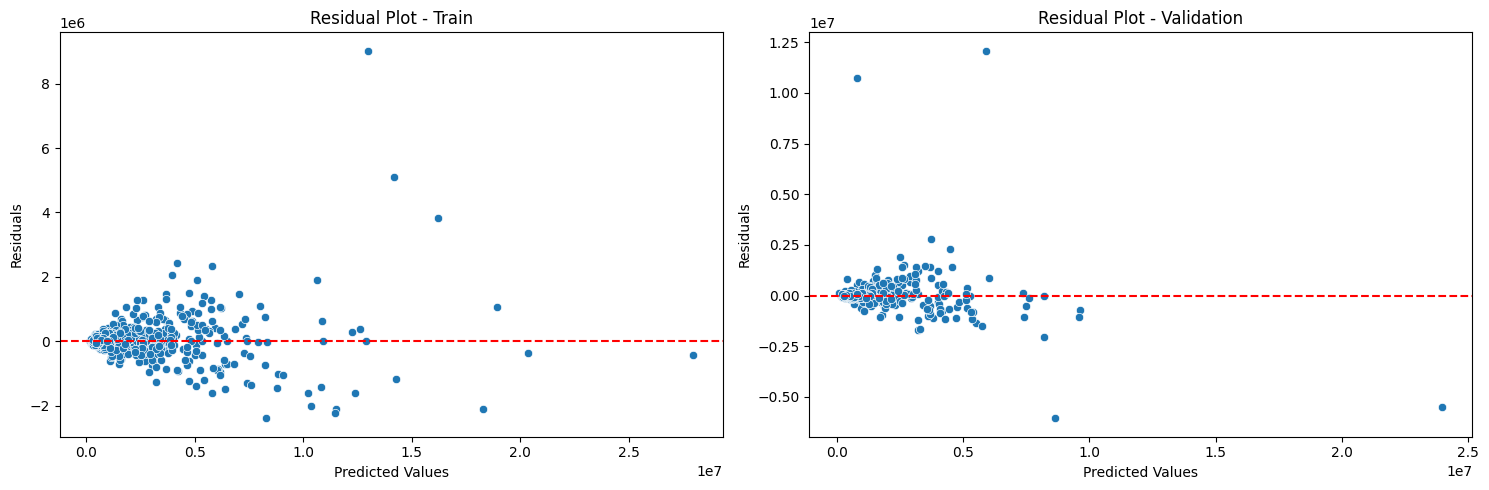

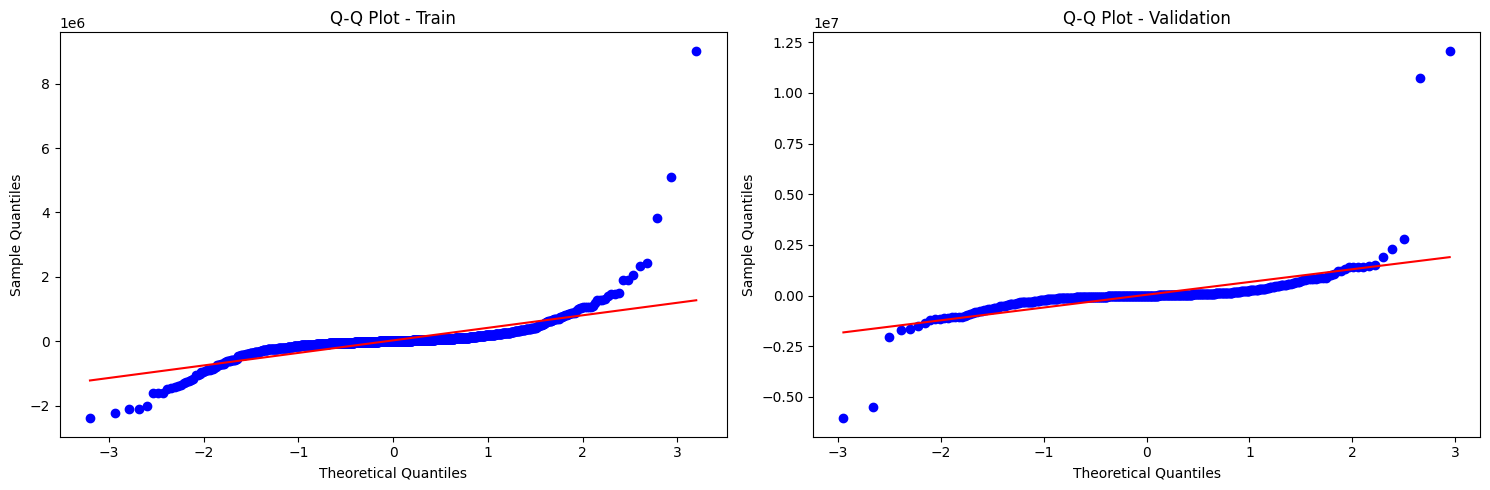

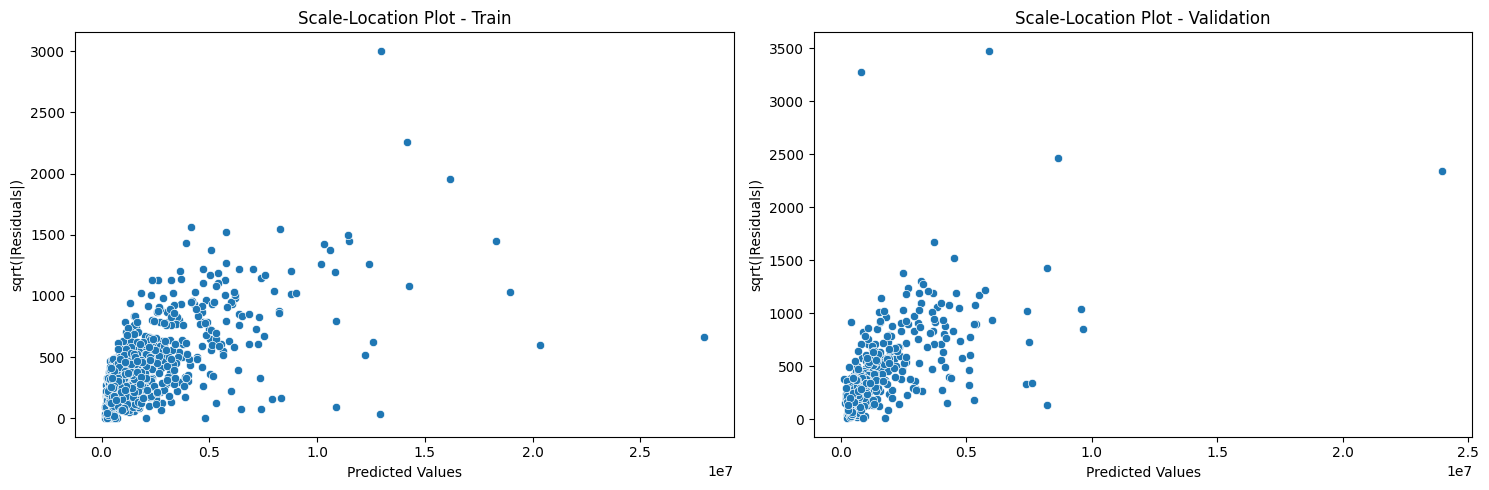

In [70]:
import warnings
from pandas.errors import PerformanceWarning
warnings.filterwarnings("ignore", category=PerformanceWarning)

from modelling.Model import MixedRegression
testing(subcols=train_df.drop(columns='Price').columns.to_list(),
        linear=False,
        deg=2,
        auto_selection=True, 
        model_type=MixedRegression) 

### choose Linear regression with auto feature selection and fitting model

In [71]:
# chosed columns
subcols = ['Max Power BHP', 'Year', 'Length', 'Transmission_Manual', 'Max Torque RPM', 'Fuel Tank Capacity', 'Seating Capacity', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Width', 'Kilometer', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Height', 'Max Torque Nm', 'Seller Type_Corporate', 'Seller Type_Individual', 'Owner']
model.fit(train_df[subcols], train_df['Price'])

# Dự đoán trên file csv được đọc vào

In [72]:
data_path = ''
test_data = pd.read_csv(data_path)
test_data = clean_data(test_data)
y = test_data['Price']

test_data.drop(drop_columns, axis=1, inplace=True)
test_data = preprocessor.transform(test_data)
test_data = pd.DataFrame(test_data, columns=feature_names)

model.predict(test_data[subcols])

y_pred = np.exp(model.predict(test_data[subcols]))
print('Test r^2: ', r2_score(y, y_pred))
print('Test MAE: ', f"{mean_absolute_error(y, y_pred):.3e}")
print('Test MSE: ', f"{mean_squared_error(y, y_pred):.3e}")

FileNotFoundError: [Errno 2] No such file or directory: ''